<a href="https://colab.research.google.com/github/camilalarrosa/ML_wine_classification/blob/main/ML_wine_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
data = pd.read_csv('/content/sample_data/wine_dataset.csv')

# Data exploration

In [36]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [37]:
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [38]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [39]:
np.unique(data['style'])

array(['red', 'white'], dtype=object)

In [40]:
# data balancing
np.unique(data['style'], return_counts=True) 

(array(['red', 'white'], dtype=object), array([1599, 4898]))

# Treatment of missing values

In [41]:
data.isnull().sum() # hasn't missing values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

# Division between predictors (x) and class (y)

In [42]:
type(data) # confirming if it is in DataFrame format

pandas.core.frame.DataFrame

In [43]:
x_data = data.iloc[:,1:12].values # predictor values (x): all rows, column 1 to 11

In [44]:
x_data # verifying x

array([[ 0.7 ,  0.  ,  1.9 , ...,  0.56,  9.4 ,  5.  ],
       [ 0.88,  0.  ,  2.6 , ...,  0.68,  9.8 ,  5.  ],
       [ 0.76,  0.04,  2.3 , ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 0.24,  0.19,  1.2 , ...,  0.46,  9.4 ,  6.  ],
       [ 0.29,  0.3 ,  1.1 , ...,  0.38, 12.8 ,  7.  ],
       [ 0.21,  0.38,  0.8 , ...,  0.32, 11.8 ,  6.  ]])

In [45]:
type(x_data) # checking the format

numpy.ndarray

In [46]:
y_data = data.iloc[:, 12].values # class: all rows in last column (12)

In [47]:
y_data # verifying y

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [48]:
type(y_data) # checking the format

numpy.ndarray

# Categorical attribute handling

Transforming the categorical attribute "style" (white or red) into a number (0 or 1)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder_style = LabelEncoder()

In [51]:
y_data = label_encoder_style.fit_transform(y_data)

In [52]:
y_data

array([0, 0, 0, ..., 1, 1, 1])

# Escalation of values

that is, leaving the values on the same scale so the algorithms don't think that one parameter is more important than the other because of very different scales

In [53]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
x_data = scaler_data.fit_transform(x_data)

In [54]:
x_data

array([[ 2.18883292, -2.19283252, -0.7447781 , ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 3.28223494, -2.19283252, -0.59764007, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 2.55330026, -1.91755268, -0.66069923, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.6054167 , -0.88525328, -0.89191614, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-0.30169391, -0.12823371, -0.91293585, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.78765037,  0.42232597, -0.97599501, ..., -1.41986693,
         1.09691202,  0.20799905]])

# Splitting the database into training and testing

in this case, setting aside 25% of the data for testing

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_data_training, x_data_testing, y_data_training, y_data_testing = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [57]:
x_data_training.shape , y_data_training.shape

((4872, 11), (4872,))

In [58]:
x_data_testing.shape , y_data_testing.shape

((1625, 11), (1625,))

# Saving preprocessed variables

In [59]:
import pickle

In [60]:
with open('wine_data.pkl', mode = 'wb') as f:
  pickle.dump([x_data_training, y_data_training, x_data_testing, y_data_testing], f)

#Testing ML algorithms for classification:

In this section, we will test 7 of the main algorithms used for classification

# Naïve Bayes 98.09

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
naive_data = GaussianNB()
naive_data.fit(x_data_training, y_data_training)

GaussianNB()

In [32]:
predictions = naive_data.predict(x_data_testing)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_data_testing

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_data_testing, predictions) * 100

98.09230769230768

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.9809230769230769

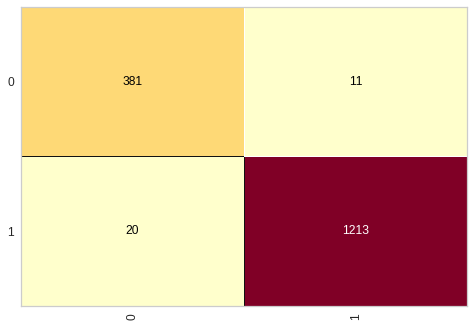

In [ ]:
cm = ConfusionMatrix(naive_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       392
           1       0.99      0.98      0.99      1233

    accuracy                           0.98      1625
   macro avg       0.97      0.98      0.97      1625
weighted avg       0.98      0.98      0.98      1625



# Decision tree 98.89

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_data = DecisionTreeClassifier(criterion='entropy', random_state = 0)
tree_data.fit(x_data_training, y_data_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions = tree_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

98.8923076923077

0.9889230769230769

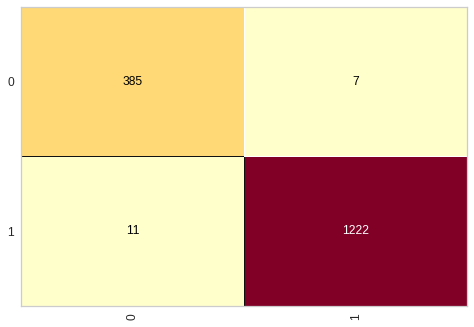

In [ ]:
cm = ConfusionMatrix(tree_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       392
           1       0.99      0.99      0.99      1233

    accuracy                           0.99      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.99      0.99      1625



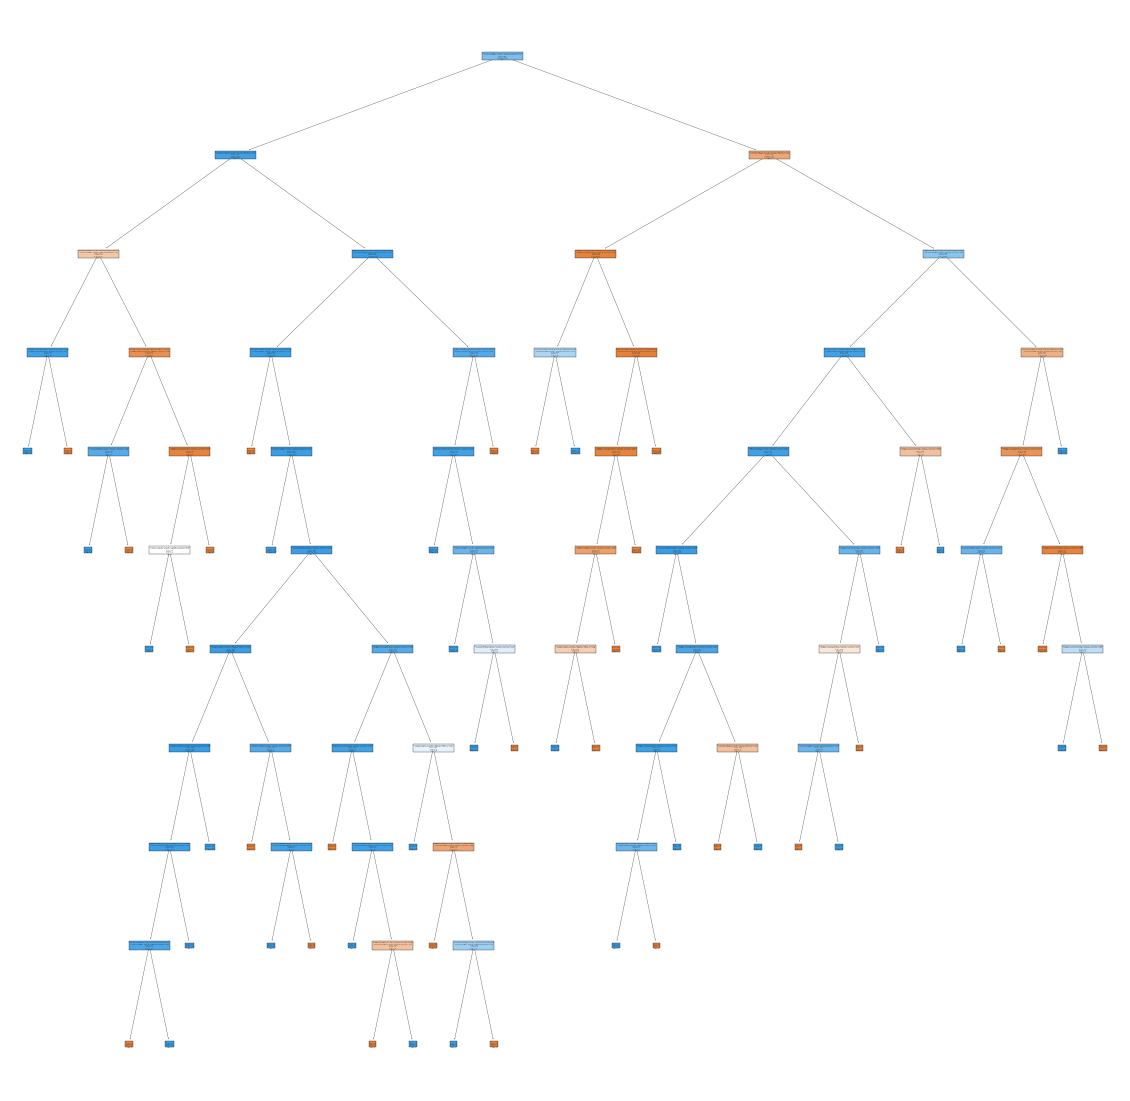

In [ ]:
from sklearn import tree
forecasters = x_data
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(tree_data, feature_names=forecasters, class_names=['0','1'], filled=True);
fig.savefig('tree_data.png')

# Random Forest 99.51

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_data = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
random_forest_data.fit(x_data_training, y_data_training)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
predictions = random_forest_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

99.50769230769231

0.9950769230769231

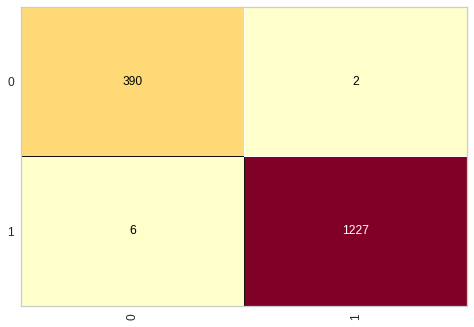

In [ ]:
cm = ConfusionMatrix(random_forest_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       1.00      1.00      1.00      1233

    accuracy                           1.00      1625
   macro avg       0.99      1.00      0.99      1625
weighted avg       1.00      1.00      1.00      1625



# Instance-based learning - knn 99.38

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_data = KNeighborsClassifier(n_neighbors=10)
knn_data.fit(x_data_training, y_data_training)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = knn_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

99.38461538461539

0.9938461538461538

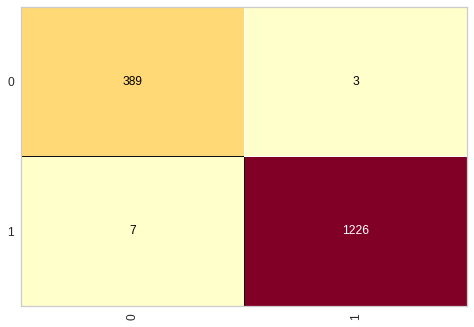

In [ ]:
cm = ConfusionMatrix(knn_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       1.00      0.99      1.00      1233

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



# Logistic regression 99.45

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_data = LogisticRegression(random_state=1)
logistic_data.fit(x_data_training, y_data_training)

LogisticRegression(random_state=1)

In [ ]:
logistic_data.intercept_

array([3.33102924])

In [ ]:
logistic_data.coef_

array([[-1.03854906,  0.27758534,  2.75516302, -0.81264315, -0.70624254,
         2.65360347, -4.5811219 , -0.16963354, -0.45014108, -1.81432649,
        -0.31439959]])

In [ ]:
predictions = logistic_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

99.44615384615385

0.9944615384615385

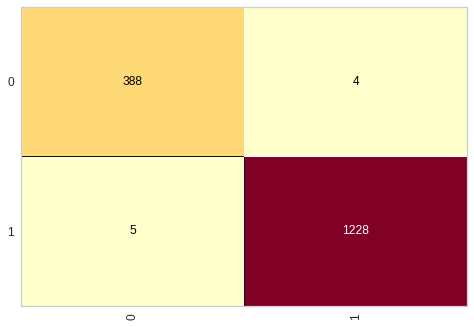

In [ ]:
cm = ConfusionMatrix(logistic_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       392
           1       1.00      1.00      1.00      1233

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



# SVM 99.57

In [63]:
from sklearn.svm import SVC

In [64]:
svm_data = SVC(kernel='linear', random_state=1)
svm_data.fit(x_data_training, y_data_training)

SVC(kernel='linear', random_state=1)

In [ ]:
predictions = svm_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

99.56923076923077

0.9956923076923077

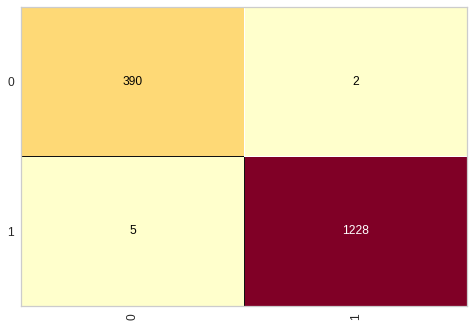

In [ ]:
cm = ConfusionMatrix(svm_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       392
           1       1.00      1.00      1.00      1233

    accuracy                           1.00      1625
   macro avg       0.99      1.00      0.99      1625
weighted avg       1.00      1.00      1.00      1625



# Artificial neural networks 99.26

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# 12 -> 7 -> 7 -> 1
neural_data = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (7,7))
neural_data.fit(x_data_training, y_data_training)

Iteration 1, loss = 0.87901599
Iteration 2, loss = 0.80616127
Iteration 3, loss = 0.75355196
Iteration 4, loss = 0.70878453
Iteration 5, loss = 0.66355677
Iteration 6, loss = 0.61222310
Iteration 7, loss = 0.55204035
Iteration 8, loss = 0.48802847
Iteration 9, loss = 0.42441311
Iteration 10, loss = 0.36206703
Iteration 11, loss = 0.30471749
Iteration 12, loss = 0.25450333
Iteration 13, loss = 0.21234134
Iteration 14, loss = 0.17859731
Iteration 15, loss = 0.15167306
Iteration 16, loss = 0.13073115
Iteration 17, loss = 0.11422762
Iteration 18, loss = 0.10125877
Iteration 19, loss = 0.09066430
Iteration 20, loss = 0.08217770
Iteration 21, loss = 0.07527654
Iteration 22, loss = 0.06942438
Iteration 23, loss = 0.06443514
Iteration 24, loss = 0.06033092
Iteration 25, loss = 0.05660515
Iteration 26, loss = 0.05356708
Iteration 27, loss = 0.05084715
Iteration 28, loss = 0.04860107
Iteration 29, loss = 0.04647184
Iteration 30, loss = 0.04463568
Iteration 31, loss = 0.04308467
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(7, 7), max_iter=1000, tol=1e-05, verbose=True)

In [ ]:
predictions = neural_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_data_testing, predictions) *100

99.26153846153845

0.9926153846153846

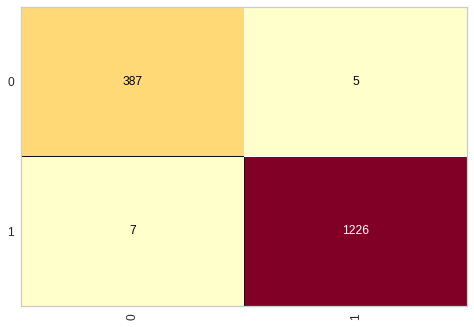

In [ ]:
cm = ConfusionMatrix(neural_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [ ]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       392
           1       1.00      0.99      1.00      1233

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



# Results obtained for each algorithm:

Naive Bayes =         98.09

Decision tree =       98.89

Random Forest =       99.51

knn =                 99.38

Logistic regression = 99.45

SVM =                 99.57

Artificial neural =   99.26

# Parameter tuning with Grid Search for Random Forest and SVM (best results)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# in cross-validation, we use the entire database, division is no longer necessary
# concatenating

x_data = np.concatenate((x_data_training, x_data_testing), axis = 0)
x_data.shape

(6497, 11)

In [ ]:
y_data = np.concatenate((y_data_training, y_data_testing), axis = 0)
y_data.shape

(6497,)

# Random Forest 99.54

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}


In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x_data, y_data)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters)
print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9953827204358381


# SVM 99.63

In [ ]:
# SVM
parameters = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(x_data, y_data)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters)
print(best_result)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.9963061526618107


# Final model chosen to make the predictions: SVM 99.69

In [78]:
import pickle
with open('wine_data.pkl', 'rb') as f:  
  x_data_training, y_data_training, x_data_testing, y_data_testing = pickle.load(f)

In [79]:
from sklearn.svm import SVC

In [80]:
svm_data = SVC(C =2, kernel='rbf', random_state=1)
svm_data.fit(x_data_training, y_data_training)

SVC(C=2, random_state=1)

In [81]:
predictions = svm_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_data_testing, predictions) *100

99.6923076923077

In [89]:
from yellowbrick.classifier import ConfusionMatrix

0.9969230769230769

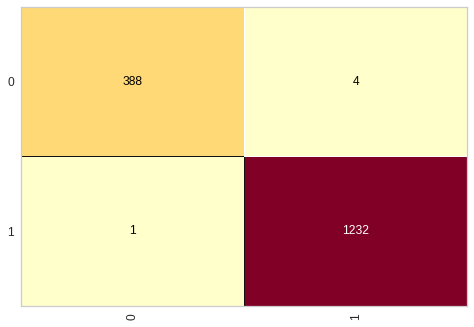

In [90]:
cm = ConfusionMatrix(svm_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [84]:
print(classification_report(y_data_testing, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       392
           1       1.00      1.00      1.00      1233

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625

